# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('https://github.com/bio-chem-info/python_course/raw/refs/heads/main/classification_data.csv')
dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [3]:
dataset = pd.read_csv('https://github.com/bio-chem-info/python_course/raw/refs/heads/main/classification_data.csv',
                      index_col=0)
dataset

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4


<Axes: >

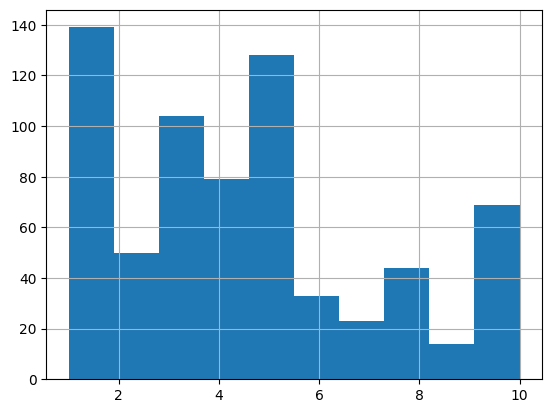

In [4]:
dataset['Clump Thickness'].hist()

In [5]:
dataset.groupby("Class").describe().T

Class                           2           4
Clump Thickness count  444.000000  239.000000
                mean     2.963964    7.188285
                std      1.672661    2.437907
                min      1.000000    1.000000
                25%      1.000000    5.000000
...                           ...         ...
Mitoses         min      1.000000    1.000000
                25%      1.000000    1.000000
                50%      1.000000    1.000000
                75%      1.000000    3.000000
                max      8.000000   10.000000

[72 rows x 2 columns]

In [6]:
!pip install pingouin
import pingouin as pg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.2 MB/s eta 0:00:00


In [7]:
pg.mwu(dataset[dataset.Class==2]['Mitoses'],
       dataset[dataset.Class==4]['Mitoses'])

,U-val,alternative,p-val,RBC,CLES
MWU,30599.0,two-sided,3.743169e-43,-0.423291,0.288354




---

`Explore the data!`

---



In [8]:
dataset['Class'].value_counts()

,count
Class,
2,444
4,239




---
`Lets get some statistics done here!`


---




In [9]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Sample code number,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1
1002945,5,4,4,5,7,10,3,2,1
1015425,3,1,1,1,2,2,3,1,1
1016277,6,8,8,1,3,4,3,7,1
1017023,4,1,1,3,2,1,3,1,1


In [10]:
y

,Class
Sample code number,
1000025,2
1002945,2
1015425,2
1016277,2
1017023,2
...,...
776715,2
841769,2
888820,4


## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_test

array([[-1.22143494, -0.69868992, -0.73961536, ..., -0.98774815,
        -0.62069958, -0.33743902],
       [-0.50794414, -0.69868992, -0.73961536, ..., -0.58605867,
        -0.62069958, -0.33743902],
       [ 0.20554667,  0.61287466,  0.61524355, ...,  0.21732028,
         0.02196611, -0.33743902],
       ...,
       [ 0.20554667, -0.69868992, -0.73961536, ..., -0.18436919,
        -0.62069958,  0.24623928],
       [-0.86468954, -0.37079877, -0.40090064, ...,  1.42238871,
        -0.62069958, -0.33743902],
       [-0.86468954, -0.69868992, -0.73961536, ..., -0.18436919,
        -0.62069958, -0.33743902]])

## Training the Logistic Regression model on the Training set

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty="elasticnet", solver="saga", l1_ratio=0.9)
classifier.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.9, penalty='elasticnet', random_state=0,
                   solver='saga')

<Axes: >

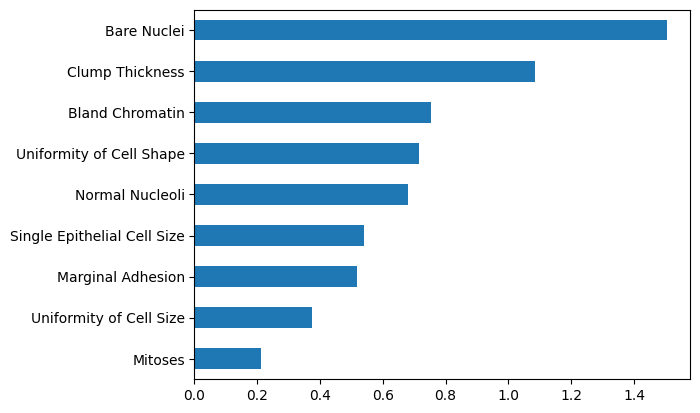

In [15]:
pd.Series(np.squeeze(classifier.coef_), name="coefs", index=X.columns).sort_values().plot.barh()

## Making the Confusion Matrix

In [16]:
y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2])

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [18]:
y_pred = pd.Series(y_pred, name='Pred', index=y_test.index)
y_pred

,Pred
Sample code number,
1173347,2
1156017,2
706426,4
1330439,4
693702,2
...,...
1266124,2
1197979,2
764974,2


In [19]:
results = pd.concat([y_test, y_pred], axis=1)
results

,Class,Pred
Sample code number,,
1173347,2,2
1156017,2,2
706426,4,4
1330439,4,4
693702,2,2
...,...,...
1266124,2,2
1197979,2,2
764974,2,2


In [20]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[103   4]
 [  5  59]]


In [21]:
accuracy_score(y_test, y_pred)*100

94.73684210526315

# K-Nearest Neighbors (K-NN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[103   4]
 [  5  59]]


0.9473684210526315

# Decision Tree Classification

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=4, class_weight="balanced")
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, random_state=0)

In [25]:
y_train.value_counts()

,count
Class,
2,337
4,175


[Text(0.4659090909090909, 0.9, 'Uniformity of Cell Size <= -0.207\nentropy = 1.0\nsamples = 512\nvalue = [256.0, 256.0]'),
 Text(0.18181818181818182, 0.7, 'Bare Nuclei <= 0.011\nentropy = 0.251\nsamples = 315\nvalue = [233.97, 10.24]'),
 Text(0.32386363636363635, 0.8, 'True  '),
 Text(0.09090909090909091, 0.5, 'Bare Nuclei <= -0.543\nentropy = 0.0\nsamples = 299\nvalue = [227.134, 0.0]'),
 Text(0.045454545454545456, 0.3, 'entropy = 0.0\nsamples = 279\nvalue = [211.941, 0.0]'),
 Text(0.13636363636363635, 0.3, 'entropy = 0.0\nsamples = 20\nvalue = [15.193, 0.0]'),
 Text(0.2727272727272727, 0.5, 'Clump Thickness <= -0.33\nentropy = 0.971\nsamples = 16\nvalue = [6.837, 10.24]'),
 Text(0.22727272727272727, 0.3, 'entropy = 0.0\nsamples = 7\nvalue = [5.318, 0.0]'),
 Text(0.3181818181818182, 0.3, 'Bland Chromatin <= -0.385\nentropy = 0.555\nsamples = 9\nvalue = [1.519, 10.24]'),
 Text(0.2727272727272727, 0.1, 'entropy = 1.0\nsamples = 3\nvalue = [1.519, 1.463]'),
 Text(0.36363636363636365, 0.1

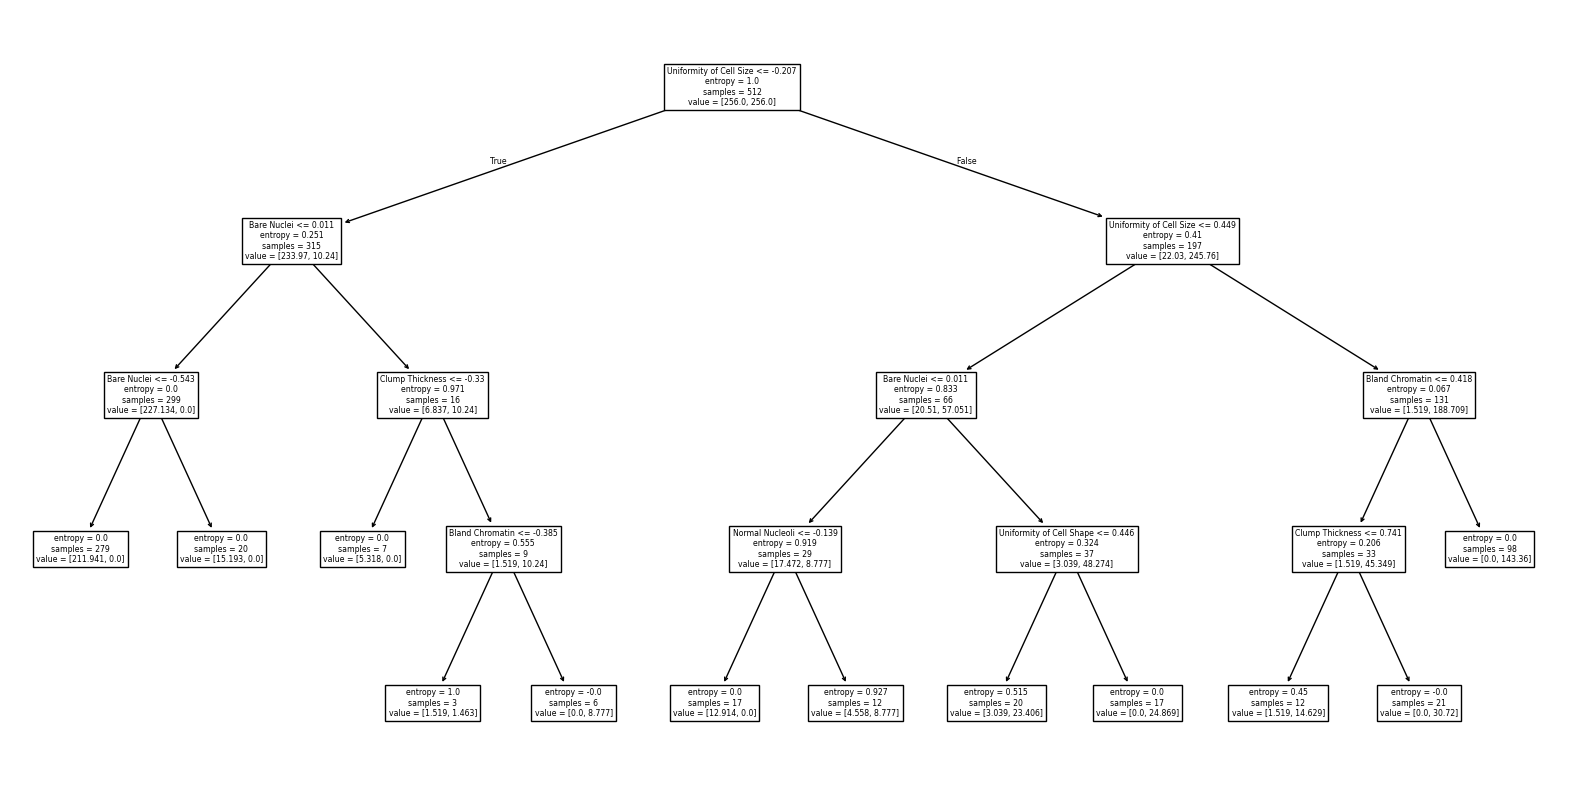

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(classifier, feature_names=X.columns)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[102   5]
 [  4  60]]


0.9473684210526315

# Random Forest Classification

In [28]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, max_depth = 6, criterion = 'entropy', random_state = 0, class_weight="balanced")
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, n_estimators=200, random_state=0)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[103   4]
 [  4  60]]


95.32163742690058